In [229]:
#importing MNIST dataset
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import tensorflow as tf

In [230]:
#loading MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [231]:
# flatten 28*28 images to a 784 vector for each image
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')
X_train.shape


(60000, 28, 28, 1)

In [232]:
X_test.shape

(10000, 28, 28, 1)

In [233]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [234]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [235]:
model = Sequential()
model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.3726 - accuracy: 0.8884 - val_loss: 0.0782 - val_accuracy: 0.9745
Epoch 2/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0989 - accuracy: 0.9697 - val_loss: 0.0515 - val_accuracy: 0.9830
Epoch 3/10
60000/60000 [==============================] - 24s 406us/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0389 - val_accuracy: 0.9868
Epoch 4/10
60000/60000 [==============================] - 28s 461us/step - loss: 0.0584 - accuracy: 0.9815 - val_loss: 0.0366 - val_accuracy: 0.9889
Epoch 5/10
60000/60000 [==============================] - 26s 436us/step - loss: 0.0506 - accuracy: 0.9843 - val_loss: 0.0338 - val_accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 27s 448us/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0337 - val_accuracy: 0.9898
Epoch 7/10
60000/60000 [==============================] 

In [236]:
print(model.summary())

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 5, 5, 15)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 375)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 128)             

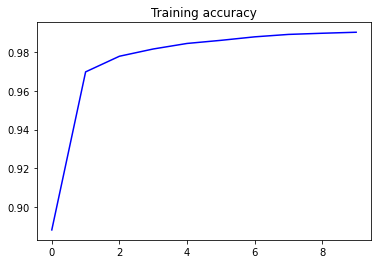

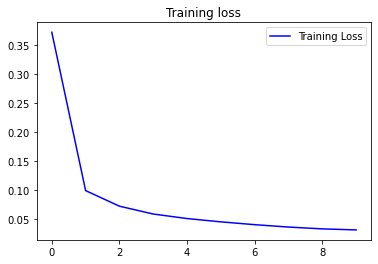

In [237]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()

In [240]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.027702047912060514
Test accuracy: 0.9911999702453613


In [254]:
#Predicting the number
prediction=model.predict(X_test)
print(np.argmax(prediction[1200]))

8


In [255]:
#reshaping X_test to make it plottable to verify if the predicted result is correct
x_test = X_test.reshape((X_test.shape[0]*X_test.shape[3]), X_test.shape[1], X_test.shape[2])

In [256]:
x_test.shape

(10000, 28, 28)

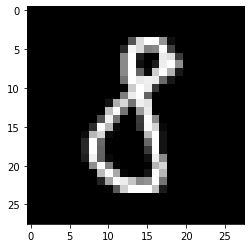

In [258]:
plt.imshow(x_test[1200], cmap=plt.get_cmap('gray'))